In [ ]:
import os
import torch
import gc
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO

In [1]:
def run_research_experiment(exp_name, yaml_file):
    print(f"\n--- Initializing Experiment: {exp_name} ---")
    
    gc.collect()
    torch.cuda.empty_cache()
    time.sleep(5) 
    
    model = YOLO("yolo11s.pt")
    
    model.train(
        data=yaml_file,
        epochs=100,
        imgsz=1024,       
        batch=-1,      
        mosaic=0.5,      
        degrees=90.0,      
        lr0=0.001,         
        close_mosaic=20,  
        project="floorplan_research",
        name=exp_name,
        device=0,
        exist_ok=True,
        verbose=True
    )

    results_path = f"floorplan_research/{exp_name}/results.csv"
    if os.path.exists(results_path):
        df = pd.read_csv(results_path)
        df.columns = [c.strip() for c in df.columns]
        fig, ax = plt.subplots(1, 2, figsize=(15, 5))
        ax[0].plot(df['epoch'], df['train/box_loss'], label='Train Loss')
        ax[0].plot(df['epoch'], df['val/box_loss'], label='Val Loss')
        ax[0].set_title(f'{exp_name} Loss')
        ax[0].legend()
        ax[1].plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@50')
        ax[1].set_title(f'{exp_name} Accuracy')
        ax[1].legend()
        plt.show()

    best_path = f"floorplan_research/{exp_name}/weights/best.pt"
    best_model = YOLO(best_path)
    val_results = best_model.val(data=yaml_file, split='test', device=0, verbose=False)
    
    maps = val_results.box.maps 
    print(f"\nFinal Analysis for {exp_name}:")
    print(f"Door mIoU: {maps[0]:.4f} | Wall mIoU: {maps[1]:.4f} | Window mIoU: {maps[2]:.4f}")
    print(f"Overall Macro mIoU: {np.mean(maps):.4f}")
    
    del model
    del best_model
    gc.collect()
    torch.cuda.empty_cache()
    print(f"Memory Cleared. Ready for next experiment.\n")
    print("-" * 40)


In [2]:
run_research_experiment("colorful_experiment", "colorful.yaml")


--- Initializing Experiment: colorful_experiment ---
Ultralytics 8.3.241  Python-3.10.19 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=20, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=colorful.yaml, degrees=90.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1024, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=0.5, multi_scale=False, name=colorful_experiment, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto,

<Figure size 1500x500 with 2 Axes>

Ultralytics 8.3.241  Python-3.10.19 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access  (ping: 0.30.0 ms, read: 301.361.5 MB/s, size: 445.5 KB)
val: Scanning C:\Users\Artem\Jupyter notebooks\DL_project\yolo_data_colorful\labels\test.cache... 29 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 29/29 28.9Kit/s 0.0s


C:\ProgramData\anaconda3\envs\ai_pipeline_env\lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 3.8s/it 7.5s<21.4s
                   all         29       1072      0.838      0.776      0.835      0.557
Speed: 32.2ms preprocess, 42.5ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to C:\Users\Artem\Jupyter notebooks\DL_project\runs\detect\val2

Final Analysis for colorful_experiment:
Door mIoU: 0.7037 | Wall mIoU: 0.3903 | Window mIoU: 0.5764
Overall Macro mIoU: 0.5568
Memory Cleared. Ready for next experiment.

----------------------------------------


In [3]:
run_research_experiment("bw_experiment", "bw.yaml")


--- Initializing Experiment: bw_experiment ---
Ultralytics 8.3.241  Python-3.10.19 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=20, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=bw.yaml, degrees=90.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1024, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=0.5, multi_scale=False, name=bw_experiment, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True

<Figure size 1500x500 with 2 Axes>

Ultralytics 8.3.241  Python-3.10.19 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access  (ping: 0.20.0 ms, read: 327.167.3 MB/s, size: 388.9 KB)
val: Scanning C:\Users\Artem\Jupyter notebooks\DL_project\yolo_data_bw\labels\test... 473 images, 0 backgrounds, 6 corrupt: 100% ━━━━━━━━━━━━ 473/473 978.3it/s 0.5s0.1s
val: C:\Users\Artem\Jupyter notebooks\DL_project\yolo_data_bw\images\test\1368.png: ignoring corrupt image/label: negative class labels or coordinate [  -0.035742]
val: C:\Users\Artem\Jupyter notebooks\DL_project\yolo_data_bw\images\test\1373.png: ignoring corrupt image/label: negative class labels or coordinate [  -0.020794   -0.020794]
val: C:\Users\Artem\Jupyter notebooks\DL_project\yolo_data_bw\images\test\1398.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0209      1.0209]
val: C:\Users\Artem\Jupyter notebooks\DL_pro

C:\ProgramData\anaconda3\envs\ai_pipeline_env\lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 30/30 1.1s/it 32.6s0.2ss
                   all        467      21531      0.842       0.78      0.843      0.589
Speed: 4.0ms preprocess, 55.9ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to C:\Users\Artem\Jupyter notebooks\DL_project\runs\detect\val3

Final Analysis for bw_experiment:
Door mIoU: 0.7704 | Wall mIoU: 0.4567 | Window mIoU: 0.5410
Overall Macro mIoU: 0.5894
Memory Cleared. Ready for next experiment.

----------------------------------------


In [ ]:
import matplotlib.image as mpimg

def show_visuals(exp_name):
    path = f"floorplan_research/{exp_name}/"
    images = ['val_batch0_labels.jpg', 'val_batch0_pred.jpg', 'confusion_matrix_normalized.png']
    
    for img_name in images:
        full_path = os.path.join(path, img_name)
        if os.path.exists(full_path):
            plt.figure(figsize=(12, 8))
            plt.imshow(mpimg.imread(full_path))
            plt.title(f"{exp_name}: {img_name}")
            plt.axis('off')
            plt.show()

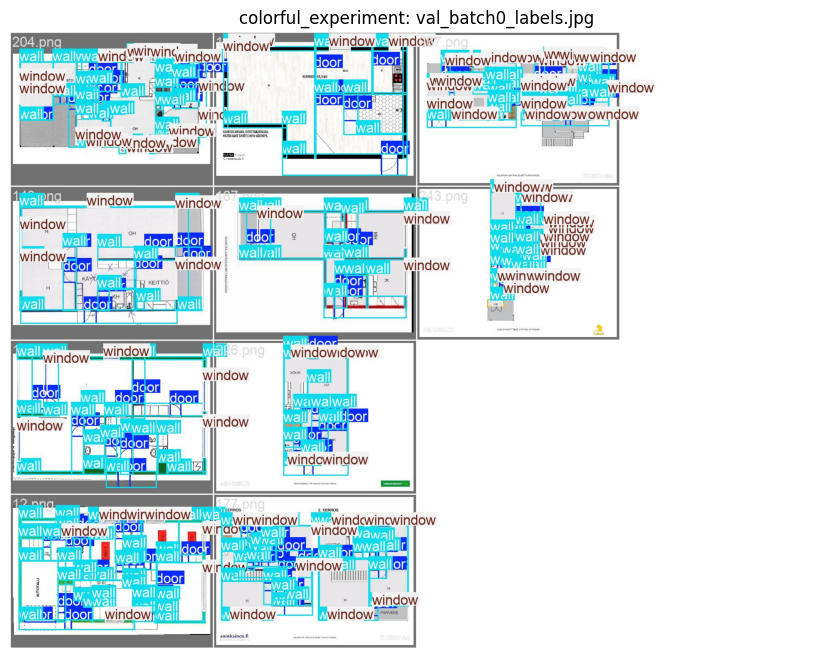

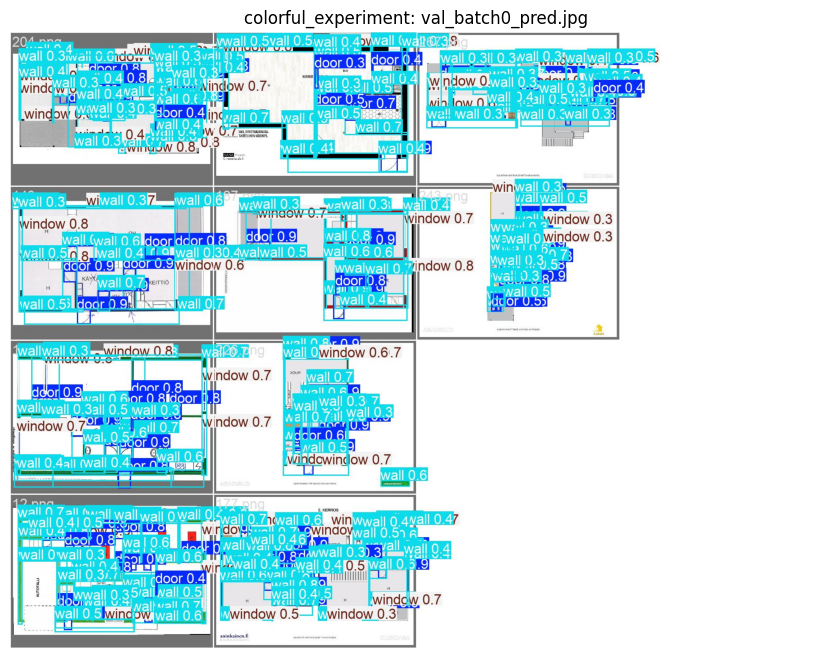

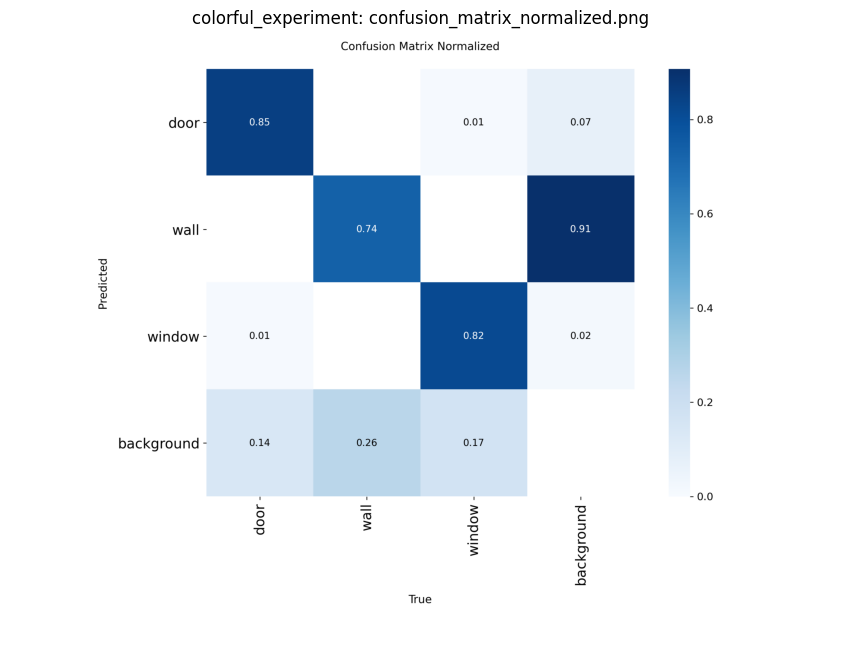

In [8]:
show_visuals("colorful_experiment")

In [5]:
%matplotlib inline